**Hands-on Session: Building and Training a Convolutional Neural Network (CNN)**

**Objective:**
By the end of this session, participants will understand the basic concepts of CNNs and be able to implement a simple CNN for image classification using the MNIST dataset.

**Introduction to CNNs**

**Definition of CNN:** A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing structured grid data, like images. It uses convolutional layers to automatically detect features and patterns, making it effective for image recognition tasks.

**Key Components:**
1. **Convolutional Layer:** Applies filters (kernels) to the input data, extracting key features like edges, textures, etc.

2. **Max Pooling Layer:** A Max Pooling layer in CNN reduces the spatial dimensions of input by selecting the maximum value from small regions (usually 2x2) of the feature map. This helps reduce computation, control overfitting, and retain important features.

3. **Fully Connected Layer / Dense Layer:** Combines features learned by earlier layers to make final predictions.

**Other Key Concepts:**

1. **Flattening:** Flattening in CNN transforms a multi-dimensional input, like a 2D feature map, into a one-dimensional vector. This step is essential before feeding the data into fully connected layers for classification or regression tasks.

2. **Activation Function:** Non-linear functions like ReLU introduce non-linearity to the network, enabling complex representations.

3. **Dropout:** Prevents overfitting by randomly deactivating neurons during training.

4. **logit:** A logit is the raw, unnormalized output of a neural network layer before applying an activation function like Softmax. It represents the network's score for each class in classification tasks, which is later converted into probabilities for interpretation.

5. **Softmax Action Function:** Softmax is an activation function used in the output layer of a neural network for multi-class classification. It converts raw scores (logits) into probabilities, ensuring the output values sum to 1, helping in predicting the most likely class.

6. **Adam Optimizer:** Adam (Adaptive Moment Estimation) is an optimization algorithm for training neural networks. It combines the benefits of two methods, AdaGrad and RMSProp, by adapting learning rates for each parameter using running averages of both gradients and their squares.

7. **Sparse Categorical Cross-Entropy:** Sparse Categorical Cross-Entropy is a loss function used for multi-class classification when target labels are integers rather than one-hot encoded vectors. It computes the difference between predicted probabilities and true labels, simplifying computation by avoiding explicit one-hot encoding.


**Applications:**
Image and video recognition, medical image analysis, self-driving cars, etc.

**Hands-on Implementation:**

**Step 1: Import Libraries**

In [ ]:
#importing the required libraries
from tensorflow.keras.datasets import mnist     #This line imports the MNIST dataset from TensorFlow’s Keras module. The MNIST dataset is a collection of 70,000 handwritten digit images (28x28 pixels) and is commonly used for training various image processing systems.
from tensorflow.keras.models import Sequential  #This line imports the Sequential model from Keras. The Sequential model is a linear stack of layers, meaning you can add one layer at a time, starting from the input layer to the output layer.
from tensorflow.keras.layers import Conv2D      #This line imports the Conv2D layer, which is a 2D convolutional layer. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. It’s commonly used in image processing tasks.
from tensorflow.keras.layers import MaxPool2D   #This line imports the MaxPool2D layer, which performs max pooling operation for spatial data. Max pooling reduces the spatial dimensions (height and width) of the input volume.
from tensorflow.keras.layers import Flatten     #This line imports the Flatten layer, which flattens the input. It converts the 2D matrix data into a vector, which can then be fed into fully connected layers.
from tensorflow.keras.layers import Dropout     #This line imports the Dropout layer, which is a regularization technique to prevent overfitting. It randomly sets a fraction of input units to 0 at each update during training time, which helps in reducing overfitting.
from tensorflow.keras.layers import Dense       #This line imports the Dense layer, which is a fully connected layer. Each neuron in this layer receives input from all neurons of the previous layer, making it a dense connection.

**MNIST Dataset:** The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), each sized 28x28 pixels. It consists of 60,000 training images and 10,000 test images, commonly used for image classification and benchmarking machine learning models.

In [ ]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()     #This line loads the MNIST dataset and splits it into training and testing sets. X_train and y_train are the training data and labels, respectively. X_test and y_test are the testing data and labels, respectively. The mnist.load_data() function returns two tuples: the first tuple contains the training data and labels, and the second tuple contains the testing data and labels.

#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))    #X_train.shape[0] is the number of training samples. X_train.shape[1] and X_train.shape[2] are the height and width of each image (28x28 pixels). The reshape function adds an extra dimension to the data, changing the shape from (num_samples, 28, 28) to (num_samples, 28, 28, 1).The extra dimension is needed because the convolutional layers in Keras expect the input to have a shape of (height, width, channels), where channels is 1 for grayscale images.
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))            #This line reshapes the testing data X_test in the same way as the training data. It changes the shape from (num_samples, 28, 28) to (num_samples, 28, 28, 1).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#checking the shape after reshaping
print(X_train.shape)              #This line prints the shape of the X_train array after reshaping.
print(X_test.shape)               #This line prints the shape of the X_test array after reshaping.

#normalizing the pixel values
X_train=X_train/255              #This line normalizes the pixel values of the training data. Pixel values in the MNIST dataset range from 0 to 255. Dividing by 255 scales these values to a range of 0 to 1, which is beneficial for training neural networks as it helps in faster convergence and better performance.
X_test=X_test/255                #This line normalizes the pixel values of the test data in the same way as the training data. Normalizing both training and test data ensures that the model receives inputs in the same range during both training and evaluation.

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#defining model
model=Sequential()                        #This line initializes a new Sequential model. The Sequential model is a linear stack of layers, where you can add layers one by one.

#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))      #This line adds a 2D convolutional layer to the model. 32 is the number of filters (or kernels) in the convolutional layer. (3,3) specifies the size of the convolutional kernel (3x3 pixels). activation='relu' applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model. input_shape=(28,28,1) specifies the shape of the input data. Here, 28x28 is the size of the images, and 1 indicates that the images are grayscale (single channel).

#adding pooling layer
model.add(MaxPool2D(2,2))      #This line adds a max pooling layer to the model. MaxPool2D(2,2) specifies a pooling operation with a 2x2 window. This reduces the spatial dimensions of the input by a factor of 2, effectively downsampling the input.

#adding fully connected layer
model.add(Flatten())            #This line adds a flattening layer, which converts the 2D matrix data into a 1D vector. This is necessary before feeding the data into fully connected (dense) layers.
model.add(Dense(100,activation='relu'))       #This line adds a fully connected (dense) layer with 100 neurons. 100 is the number of neurons in this layer. activation='relu' applies the ReLU activation function to introduce non-linearity.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#adding output layer
model.add(Dense(10,activation='softmax'))      #This line adds the output layer to the model. 10 is the number of neurons in this layer, corresponding to the 10 classes of digits (0-9) in the MNIST dataset.activation='softmax' applies the softmax activation function, which converts the output to a probability distribution over the 10 classes. Each neuron’s output represents the probability of the input image belonging to a particular class.

#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    #This line compiles the model, configuring the learning process. loss='sparse_categorical_crossentropy' specifies the loss function to be used. Sparse categorical crossentropy is used for multi-class classification problems where the target labels are integers. optimizer='adam' specifies the optimizer to be used. Adam (Adaptive Moment Estimation) is an efficient optimization algorithm that adjusts the learning rate during training.metrics=['accuracy'] specifies the metric to be evaluated during training and testing. Here, accuracy is used to measure the performance of the model.

#fitting the model
history = model.fit(X_train,y_train,epochs=10, validation_data = (X_test, y_test))     #This line trains (fits) the model on the training data. X_train and y_train are the training data and labels. epochs=10 specifies the number of epochs (iterations over the entire training dataset). validation_data=(X_test, y_test) specifies the validation data to be used for evaluating the model at the end of each epoch. This helps in monitoring the model’s performance on unseen data during training. The history object stores the training history, including the loss and accuracy for each epoch.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4149 - loss: 1.6895 - val_accuracy: 0.4941 - val_loss: 0.9985
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5028 - loss: 0.9268 - val_accuracy: 0.4981 - val_loss: 0.8565
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5020 - loss: 0.8203 - val_accuracy: 0.4987 - val_loss: 0.8151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5047 - loss: 0.7858 - val_accuracy: 0.4979 - val_loss: 0.8047
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5126 - loss: 0.7690 - val_accuracy: 0.7803 - val_loss: 0.6053
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7955 - loss: 0.4866 - val_accuracy: 0.8932 - val_loss: 0.3810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9045 - loss: 0.2824 - val_accuracy: 0.8850 - val_loss: 0.2465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9091 - loss: 0.1873 - 

In [ ]:
#evaluting the model
model.evaluate(X_test,y_test)      #This line evaluates the performance of the trained model on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.1053


[0.09062763303518295, 0.9854999780654907]

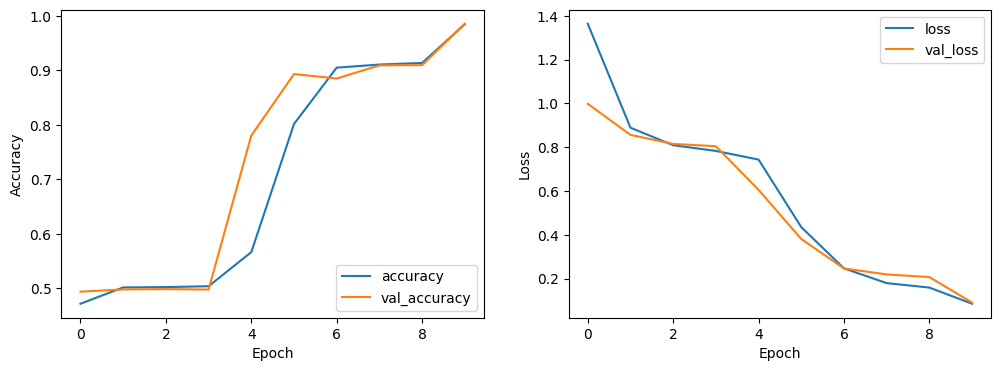

In [ ]:
#Plot Accuracy and Loss

import matplotlib.pyplot as plt                                     #This line imports the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python.

plt.figure(figsize=(12, 4))                                         #This line creates a new figure with a specified size of 12 inches by 4 inches.
plt.subplot(1, 2, 1)                                                #This line creates a subplot in a 1x2 grid (1 row, 2 columns) and selects the first subplot for plotting.
plt.plot(history.history['accuracy'], label='accuracy')             #This line plots the training accuracy over epochs. history.history['accuracy'] contains the accuracy values for each epoch.
plt.plot(history.history['val_accuracy'], label='val_accuracy')     #This line plots the validation accuracy over epochs. history.history['val_accuracy'] contains the validation accuracy values for each epoch.
plt.xlabel('Epoch')                                                 #This line sets the label for the x-axis to “Epoch”.
plt.ylabel('Accuracy')                                              #This line sets the label for the y-axis to “Accuracy”.
plt.legend(loc='lower right')                                      #This line adds a legend to the plot, placing it in the lower right corner.

plt.subplot(1, 2, 2)                                         #This line creates a second subplot in the 1x2 grid and selects the second subplot for plotting.
plt.plot(history.history['loss'], label='loss')              #This line plots the training loss over epochs. history.history['loss'] contains the loss values for each epoch.
plt.plot(history.history['val_loss'], label='val_loss')      #This line plots the validation loss over epochs. history.history['val_loss'] contains the validation loss values for each epoch.
plt.xlabel('Epoch')                                          #This line sets the label for the x-axis to “Epoch”.
plt.ylabel('Loss')                                           #This line sets the label for the y-axis to “Loss”.
plt.legend(loc='upper right')                                #This line adds a legend to the plot, placing it in the upper right corner.

plt.show()                                                   #This line displays the figure with the subplots.

**Accuracy vs. Epoch:** Accuracy and Validation Accuracy both start below 0.5 and increase steadily, approaching 1.0 as the number of epochs increases.
This suggests that the model is learning well from the training data and generalizing better on the validation data over time.

**Loss vs. Epoch:** Loss and Validation Loss both start above 1.2 and decrease towards 0 as the number of epochs increases. This indicates that the model’s predictions are becoming more accurate, with fewer errors as training progresses.

The increasing accuracy and decreasing loss values suggest that the model is effectively learning and improving its performance with more training epochs.The trends indicate that the model is converging, meaning it is getting closer to its optimal performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


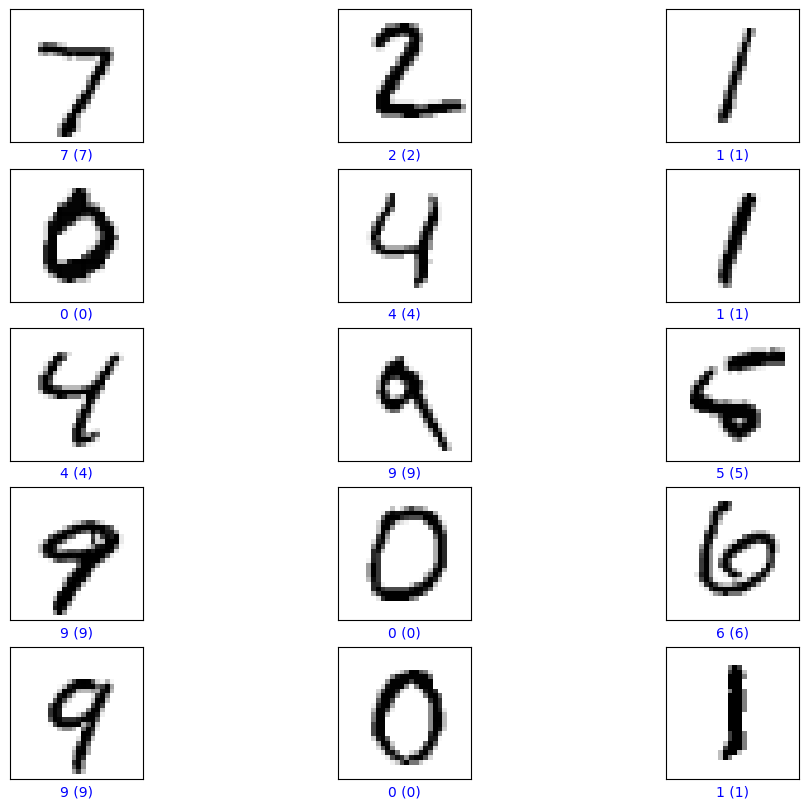

In [ ]:
#Make Predictions

predictions = model.predict(X_test)                                  #This line uses the trained model to make predictions on the test data (X_test). The predictions are stored in the variable predictions.

# Visualize some predictions
import numpy as np                                                   #This line imports the NumPy library, which is used for numerical operations in Python.

def plot_image(i, predictions_array, true_label, img):                                    #This line defines a function named plot_image that takes four parameters: i (index), predictions_array (array of predictions), true_label (true labels), and img (images).
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]      #This line extracts the i-th prediction, true label, and image from the respective arrays.
    plt.grid(False)                                         #This line disables the grid lines on the plot.
    plt.xticks([])                                          #These lines remove the tick marks on the x and y axes.
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)                    #This line displays the image in grayscale.

    predicted_label = np.argmax(predictions_array)         #This line finds the index of the highest value in the predictions array, which corresponds to the predicted label.
    if predicted_label == true_label:                      #This line checks if the predicted label matches the true label.
        color = 'blue'                                     #If the prediction is correct, the label color is set to blue.
    else:
        color = 'red'                                      #If the prediction is incorrect, the label color is set to red.

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)     #This line sets the x-axis label to show the predicted and true labels, colored based on the prediction’s correctness.

num_rows = 5
num_cols = 3                                                     #These lines set the number of rows and   columns for the subplot grid.
num_images = num_rows * num_cols                                 #Calculates the total number of images to be displayed.
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))             #This line sets the figure size for the plot.
for i in range(num_images):                                      #This line starts a loop to iterate over the number of images.
    plt.subplot(num_rows, num_cols, i + 1)                       #This line creates a subplot in the specified grid position.
    plot_image(i, predictions, y_test, X_test)                   #This line calls the plot_image function to plot the i-th image.
plt.show()                                                       #This line displays the plot.

The MNIST dataset includes images of 10 different classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Each image has a label beneath it, which likely indicates the predicted class by the CNN. The numbers in parentheses represent the actual class index or the confidence score of the prediction.

The CNN is attempting to classify each image into one of the 10 classes. The labels and numbers help us understand how confident the model is in its predictions or what the actual class is.
If the predicted class matches the actual class, it indicates a correct classification. If not, it shows a misclassification.

This output is a practical way to evaluate the performance of a CNN on the MNIST dataset. By examining the predicted labels and comparing them with the actual images, you can gain insights into the model’s strengths and areas for improvement.